In [ ]:
# Load CSV files with bad line handling
listings_df = pd.read_csv('listings.csv', on_bad_lines='skip')
calendar_df = pd.read_csv('calendar.csv', on_bad_lines='skip')

# Check shapes and preview data
print("✅ Listings shape:", listings_df.shape)
print("✅ Calendar shape:", calendar_df.shape)

print("\n🧾 Listings preview:")
display(listings_df.head())

print("\n📅 Calendar preview:")
display(calendar_df.head())


✅ Listings shape: (27530, 75)
✅ Calendar shape: (1559111, 7)

🧾 Listings preview:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,56229,https://www.airbnb.com/rooms/56229,20241211032909,2024-12-12,city scrape,Cosy Double studio in Zone 2 Hammersmith (1),NaN,NaN,https://a0.muscache.com/pictures/3860587/79e73...,216660,...,4.79,4.92,4.71,NaN,f,11.0,9.0,1.0,0.0,0.84
1,62970,https://www.airbnb.com/rooms/62970,20241211032909,2024-12-12,city scrape,3 Bedrm with Garden off Brick lane refurbd Oct24,Recently renovated (Oct 2024) warehouse conve...,The neighbourhood is fantastic with Brick Lane...,https://a0.muscache.com/pictures/prohost-api/H...,336059,...,4.74,4.63,4.51,NaN,t,1.0,1.0,0.0,0.0,1.05
2,63948,https://www.airbnb.com/rooms/63948,20241211032909,2024-12-12,city scrape,Cosy Double studio in Zone 2 Hammersmith (4),NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,216660,...,4.78,4.91,4.60,NaN,f,11.0,9.0,1.0,0.0,1.06
3,66772,https://www.airbnb.com/rooms/66772,20241211032909,2024-12-11,city scrape,Cosy Double studio in Zone 2 Hammersmith (3),NaN,NaN,https://a0.muscache.com/pictures/c71a4e64-97f8...,216660,...,4.77,4.92,4.67,NaN,f,11.0,9.0,1.0,0.0,1.10
4,69198,https://www.airbnb.com/rooms/69198,20241211032909,2024-12-11,city scrape,Spacious single room in quiet flat,NaN,The flat is situated in a culturally vibrant a...,https://a0.muscache.com/pictures/6073529/f5cf9...,345886,...,4.85,4.62,4.23,NaN,f,1.0,0.0,1.0,0.0,0.09



📅 Calendar preview:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,346523,2024-12-12,f,$275.00,NaN,3.0,365.0
1,346523,2024-12-13,f,$275.00,NaN,3.0,365.0
2,346523,2024-12-14,f,$275.00,NaN,3.0,365.0
3,346523,2024-12-15,f,$275.00,NaN,3.0,365.0
4,346523,2024-12-16,f,$275.00,NaN,3.0,365.0


In [ ]:
# Clean price in listings_df
listings_df['price'] = listings_df['price'].replace('[\$,£,]', '', regex=True).astype(float)

# Clean price in calendar_df
calendar_df['price'] = calendar_df['price'].replace('[\$,£,]', '', regex=True)
calendar_df['price'] = pd.to_numeric(calendar_df['price'], errors='coerce')


In [ ]:
# Select important features from listings_df
listings_simple = listings_df[[
    'id', 'name', 'neighbourhood_cleansed', 'latitude', 'longitude',
    'price', 'bedrooms', 'bathrooms'
]].rename(columns={'id': 'listing_id'})


In [ ]:
# Merge on listing_id
merged_df = pd.merge(calendar_df, listings_simple, on='listing_id', how='inner')

# Drop unavailable rows
merged_df = merged_df[merged_df['available'] == 't']  # Keep only available nights

print("📊 Merged data shape:", merged_df.shape)
display(merged_df.head())


📊 Merged data shape: (334530, 14)


,listing_id,date,available,price_x,adjusted_price,minimum_nights,maximum_nights,name,neighbourhood_cleansed,latitude,longitude,price_y,bedrooms,bathrooms
366,347389,2024-12-12,t,115.0,NaN,2.0,30.0,Canary Wharf/Excel riverside luxury,Newham,51.49962,0.03246,135.0,1.0,1.0
367,347389,2024-12-13,t,115.0,NaN,2.0,30.0,Canary Wharf/Excel riverside luxury,Newham,51.49962,0.03246,135.0,1.0,1.0
368,347389,2024-12-14,t,115.0,NaN,2.0,30.0,Canary Wharf/Excel riverside luxury,Newham,51.49962,0.03246,135.0,1.0,1.0
369,347389,2024-12-15,t,115.0,NaN,2.0,30.0,Canary Wharf/Excel riverside luxury,Newham,51.49962,0.03246,135.0,1.0,1.0
370,347389,2024-12-16,t,115.0,NaN,2.0,30.0,Canary Wharf/Excel riverside luxury,Newham,51.49962,0.03246,135.0,1.0,1.0


In [ ]:
# Convert 'date' to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Add new date-based features
merged_df['month'] = merged_df['date'].dt.month
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek
merged_df['is_weekend'] = merged_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
# Fill any missing bedrooms/bathrooms with 0 (to avoid NaNs)
merged_df['bedrooms'] = merged_df['bedrooms'].fillna(0).astype(int)
merged_df['bathrooms'] = merged_df['bathrooms'].fillna(0).astype(int)

# Create a property class string
merged_df['property_class'] = (
    merged_df['neighbourhood_cleansed'] + '-' +
    merged_df['bedrooms'].astype(str) + 'bed-' +
    merged_df['bathrooms'].astype(str) + 'bath'
)


In [ ]:
print("Unique property classes:", merged_df['property_class'].nunique())
display(merged_df[['property_class', 'price_x', 'month', 'is_weekend']].head())


Unique property classes: 270


,property_class,price_x,month,is_weekend
366,Newham-1bed-1bath,115.0,12,0
367,Newham-1bed-1bath,115.0,12,0
368,Newham-1bed-1bath,115.0,12,1
369,Newham-1bed-1bath,115.0,12,1
370,Newham-1bed-1bath,115.0,12,0


In [ ]:
# Features for price model
price_features = merged_df[[
    'bedrooms', 'bathrooms', 'neighbourhood_cleansed', 'month', 'day_of_week', 'is_weekend'
]]

# One-hot encode neighbourhood
price_features = pd.get_dummies(price_features, columns=['neighbourhood_cleansed'])

# Target: actual price per night
price_target = merged_df['price_x']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(price_features, price_target, test_size=0.2, random_state=42)

# Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions & MAE
price_preds = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, price_preds)

print(f"💰 Price Prediction MAE: £{mae:.2f}")


💰 Price Prediction MAE: £52.87


In [ ]:
import pandas as pd

# Step 1: Re-merge calendar and listings (NO filtering for availability)
merged_df_all = pd.merge(calendar_df, listings_simple, on='listing_id', how='inner')

# Step 2: Clean price from calendar.csv (usually becomes price_x)
merged_df_all['price_x'] = merged_df_all['price_x'].replace('[\$,£,]', '', regex=True)
merged_df_all['price_x'] = pd.to_numeric(merged_df_all['price_x'], errors='coerce')

# Step 3: Convert date column to datetime
merged_df_all['date'] = pd.to_datetime(merged_df_all['date'])

# Step 4: Extract time-based features
merged_df_all['month'] = merged_df_all['date'].dt.month
merged_df_all['day_of_week'] = merged_df_all['date'].dt.dayofweek
merged_df_all['is_weekend'] = merged_df_all['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Step 5: Clean bedrooms and bathrooms
merged_df_all['bedrooms'] = merged_df_all['bedrooms'].fillna(0).astype(int)
merged_df_all['bathrooms'] = merged_df_all['bathrooms'].fillna(0).astype(int)

# Step 6: Create binary label: 1 = booked, 0 = available
merged_df_all['is_booked'] = merged_df_all['available'].apply(lambda x: 0 if x == 't' else 1)


In [ ]:
print("✅ Full merged dataset shape:", merged_df_all.shape)
display(merged_df_all[['date', 'price_x', 'bedrooms', 'bathrooms', 'neighbourhood_cleansed', 'is_booked']].head())


✅ Full merged dataset shape: (1559111, 18)


,date,price_x,bedrooms,bathrooms,neighbourhood_cleansed,is_booked
0,2024-12-12,275.0,2,0,Kensington and Chelsea,1
1,2024-12-13,275.0,2,0,Kensington and Chelsea,1
2,2024-12-14,275.0,2,0,Kensington and Chelsea,1
3,2024-12-15,275.0,2,0,Kensington and Chelsea,1
4,2024-12-16,275.0,2,0,Kensington and Chelsea,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['price_x']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'price_x'}, axis=1)
              .sort_values('price_x', ascending=True))
  xs = counted['price_x']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('price_x', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price_x')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Feature set
occ_features = merged_df_all[[
    'bedrooms', 'bathrooms', 'neighbourhood_cleansed', 'month', 'day_of_week', 'is_weekend'
]]
occ_features = pd.get_dummies(occ_features, columns=['neighbourhood_cleansed'])

# Step 2: Target
occ_target = merged_df_all['is_booked']

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(occ_features, occ_target, test_size=0.2, random_state=42)

# Step 4: Model
rf_occ_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_occ_model.fit(X_train, y_train)

# Step 5: Predict and evaluate
occ_preds = rf_occ_model.predict(X_test)
acc = accuracy_score(y_test, occ_preds)

print(f"📆 Occupancy Prediction Accuracy: {acc:.2%}")
print(classification_report(y_test, occ_preds))


📆 Occupancy Prediction Accuracy: 84.18%
              precision    recall  f1-score   support

           0       0.63      0.62      0.63     66977
           1       0.90      0.90      0.90    244846

    accuracy                           0.84    311823
   macro avg       0.77      0.76      0.76    311823
weighted avg       0.84      0.84      0.84    311823



In [ ]:
# Recreate the property_class column
merged_df_all['property_class'] = (
    merged_df_all['neighbourhood_cleansed'] + '-' +
    merged_df_all['bedrooms'].astype(str) + 'bed-' +
    merged_df_all['bathrooms'].astype(str) + 'bath'
)


In [ ]:
# ✅ Only include listings with real bedroom and bathroom values
valid_rows = merged_df_all[(merged_df_all['bedrooms'] > 0) & (merged_df_all['bathrooms'] > 0)]

# ✅ Group by property class and take the first valid entry
forecast_samples = valid_rows.groupby('property_class').first().reset_index()

# ✅ Preview cleaned forecast sample listings
print("✅ Clean forecast samples:", forecast_samples.shape)
display(forecast_samples[['listing_id', 'property_class', 'neighbourhood_cleansed', 'bedrooms', 'bathrooms']].head())





✅ Clean forecast samples: (207, 19)


,listing_id,property_class,neighbourhood_cleansed,bedrooms,bathrooms
0,198258,Barking and Dagenham-1bed-1bath,Barking and Dagenham,1,1
1,349339,Barnet-1bed-1bath,Barnet,1,1
2,7180024,Barnet-1bed-3bath,Barnet,1,3
3,7172597,Barnet-1bed-4bath,Barnet,1,4
4,338198,Barnet-2bed-1bath,Barnet,2,1


In [ ]:
from datetime import datetime, timedelta

# Generate future dates (1 year ahead)
future_dates = pd.date_range(start=datetime.today(), periods=365)

# Repeat listings + dates
forecast_rows = []
for _, row in forecast_samples.iterrows():
    for date in future_dates:
        forecast_rows.append({
            'listing_id': row['listing_id'],
            'neighbourhood_cleansed': row['neighbourhood_cleansed'],
            'bedrooms': row['bedrooms'],
            'bathrooms': row['bathrooms'],
            'date': date
        })

forecast_df = pd.DataFrame(forecast_rows)
print("📅 Forecast table shape:", forecast_df.shape)
display(forecast_df.head())


📅 Forecast table shape: (75555, 5)


,listing_id,neighbourhood_cleansed,bedrooms,bathrooms,date
0,198258,Barking and Dagenham,1,1,2025-04-23 22:00:10.853032
1,198258,Barking and Dagenham,1,1,2025-04-24 22:00:10.853032
2,198258,Barking and Dagenham,1,1,2025-04-25 22:00:10.853032
3,198258,Barking and Dagenham,1,1,2025-04-26 22:00:10.853032
4,198258,Barking and Dagenham,1,1,2025-04-27 22:00:10.853032


In [ ]:
# Step 1: Add time-based features
forecast_df['month'] = forecast_df['date'].dt.month
forecast_df['day_of_week'] = forecast_df['date'].dt.dayofweek
forecast_df['is_weekend'] = forecast_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Step 2: Match model inputs
forecast_features = forecast_df[[
    'bedrooms', 'bathrooms', 'neighbourhood_cleansed', 'month', 'day_of_week', 'is_weekend'
]]
forecast_features = pd.get_dummies(forecast_features)

# Step 3: Align forecast feature columns with model training data
for col in price_features.columns:
    if col not in forecast_features.columns:
        forecast_features[col] = 0
forecast_features = forecast_features[price_features.columns]

# Step 4: Predict using trained models
forecast_df['predicted_price'] = rf_model.predict(forecast_features)
forecast_df['predicted_occupancy'] = rf_occ_model.predict(forecast_features)

# Optional: Round price to nearest pound
forecast_df['predicted_price'] = forecast_df['predicted_price'].round(0)

# Display results
display(forecast_df.head(10))


,listing_id,neighbourhood_cleansed,bedrooms,bathrooms,date,month,day_of_week,is_weekend,predicted_price,predicted_occupancy
0,198258,Barking and Dagenham,1,1,2025-04-23 22:00:10.853032,4,2,0,44.0,0
1,198258,Barking and Dagenham,1,1,2025-04-24 22:00:10.853032,4,3,0,45.0,0
2,198258,Barking and Dagenham,1,1,2025-04-25 22:00:10.853032,4,4,0,44.0,0
3,198258,Barking and Dagenham,1,1,2025-04-26 22:00:10.853032,4,5,1,44.0,0
4,198258,Barking and Dagenham,1,1,2025-04-27 22:00:10.853032,4,6,1,44.0,0
5,198258,Barking and Dagenham,1,1,2025-04-28 22:00:10.853032,4,0,0,44.0,0
6,198258,Barking and Dagenham,1,1,2025-04-29 22:00:10.853032,4,1,0,43.0,0
7,198258,Barking and Dagenham,1,1,2025-04-30 22:00:10.853032,4,2,0,44.0,0
8,198258,Barking and Dagenham,1,1,2025-05-01 22:00:10.853032,5,3,0,44.0,0
9,198258,Barking and Dagenham,1,1,2025-05-02 22:00:10.853032,5,4,0,44.0,0


In [ ]:
# ✅ Fix date format for Excel
forecast_df['date'] = forecast_df['date'].dt.strftime('%Y-%m-%d')

# ✅ Save fixed CSV
forecast_df.to_csv('12_month_forecast_results.csv', index=False)


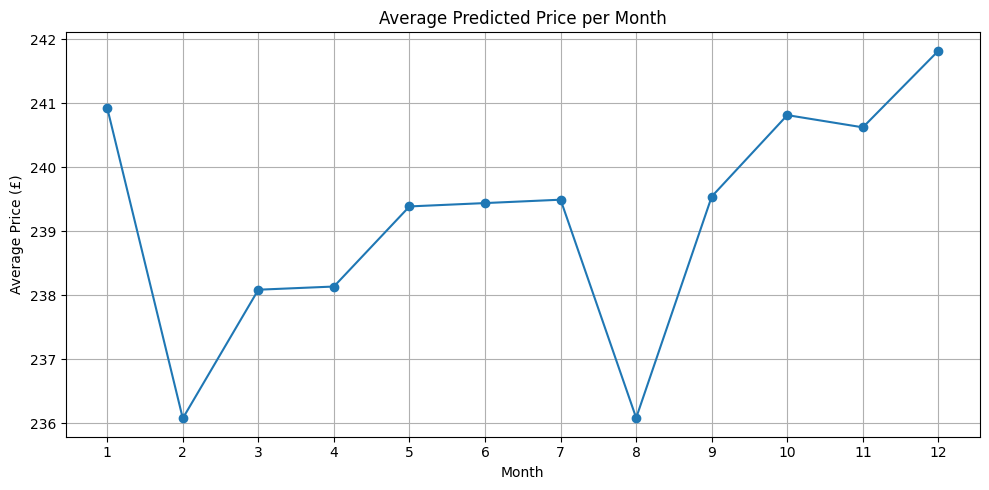

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load forecast file
forecast_df = pd.read_csv('12_month_forecast_results.csv')

# Group by month
monthly_price = forecast_df.groupby('month')['predicted_price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_price['month'], monthly_price['predicted_price'], marker='o')
plt.title("Average Predicted Price per Month")
plt.xlabel("Month")
plt.ylabel("Average Price (£)")
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


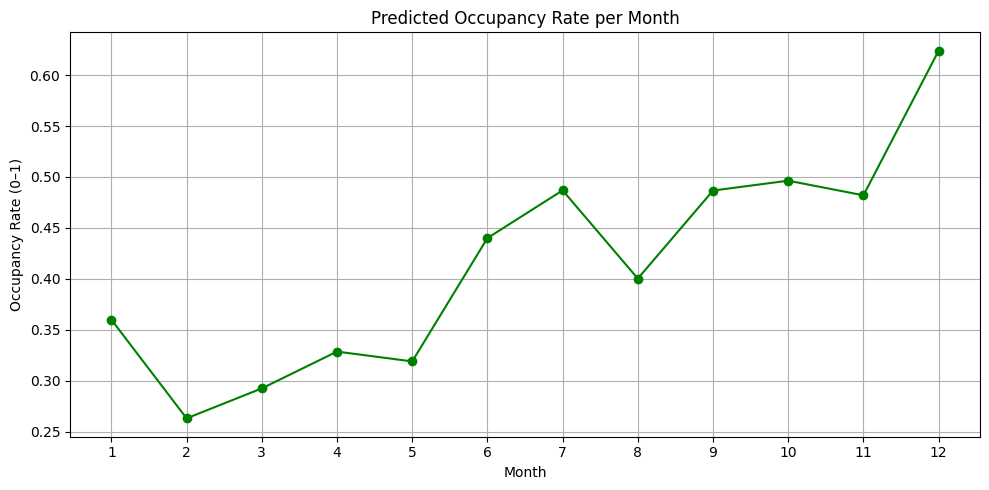

In [ ]:
# Group by month
monthly_occ = forecast_df.groupby('month')['predicted_occupancy'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_occ['month'], monthly_occ['predicted_occupancy'], marker='o', color='green')
plt.title("Predicted Occupancy Rate per Month")
plt.xlabel("Month")
plt.ylabel("Occupancy Rate (0–1)")
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


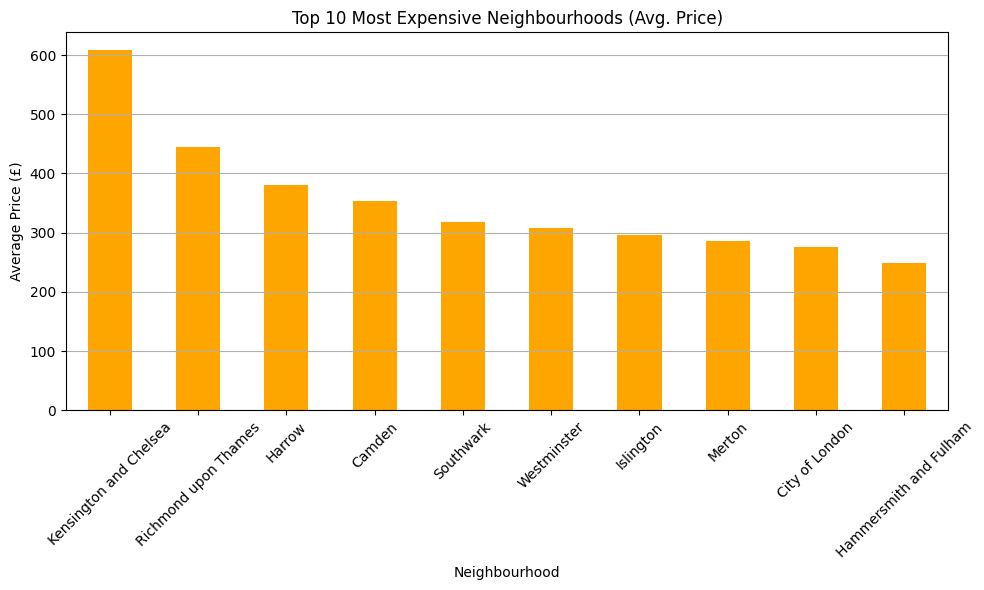

In [ ]:
# Top 10 most expensive neighbourhoods
top_areas = (
    forecast_df.groupby('neighbourhood_cleansed')['predicted_price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
top_areas.plot(kind='bar', color='orange')
plt.title("Top 10 Most Expensive Neighbourhoods (Avg. Price)")
plt.ylabel("Average Price (£)")
plt.xlabel("Neighbourhood")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


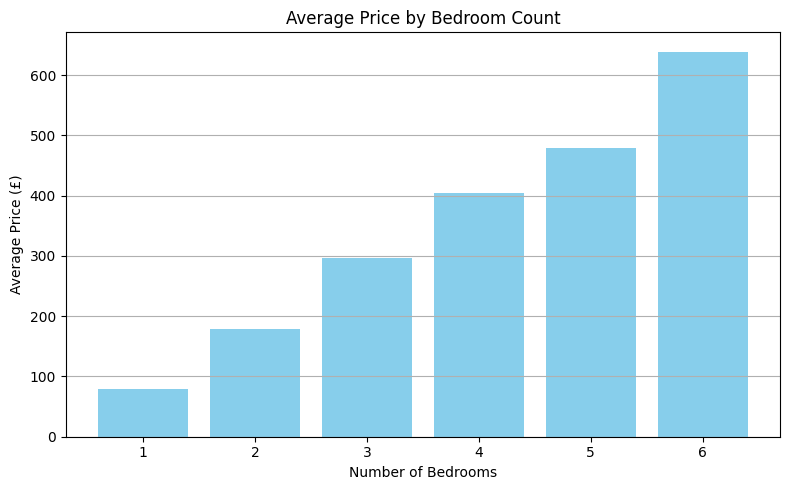

In [ ]:
# Group by bedroom count
price_by_bed = forecast_df.groupby('bedrooms')['predicted_price'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(price_by_bed['bedrooms'], price_by_bed['predicted_price'], color='skyblue')
plt.title("Average Price by Bedroom Count")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price (£)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


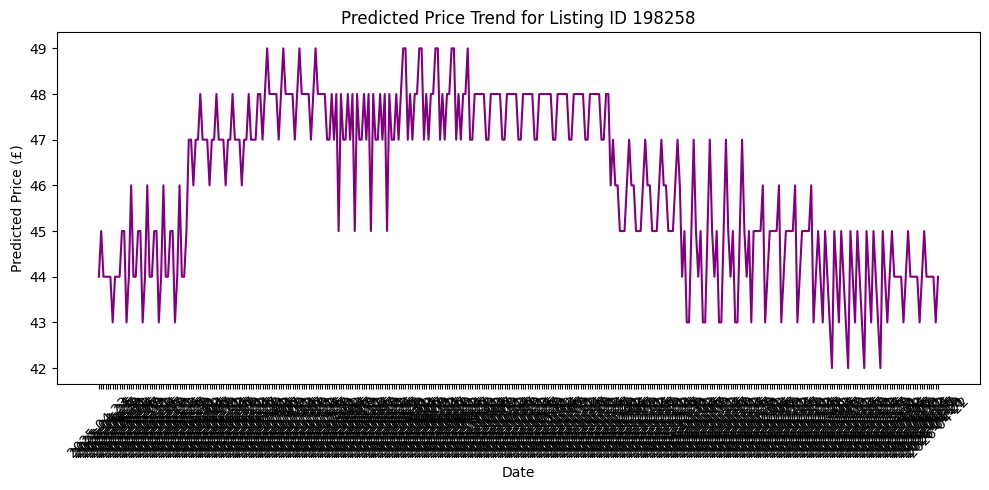

In [ ]:
# Pick one sample listing_id
sample_id = forecast_df['listing_id'].unique()[0]

# Filter and sort by date
sample_listing = forecast_df[forecast_df['listing_id'] == sample_id].sort_values('date')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(sample_listing['date'], sample_listing['predicted_price'], color='purple')
plt.title(f"Predicted Price Trend for Listing ID {sample_id}")
plt.xlabel("Date")
plt.ylabel("Predicted Price (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


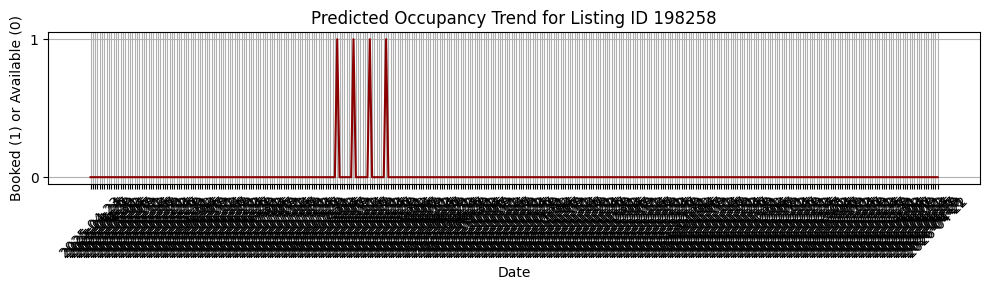

In [ ]:
# Plot occupancy trend for same sample listing
plt.figure(figsize=(10, 3))
plt.plot(sample_listing['date'], sample_listing['predicted_occupancy'], color='darkred')
plt.title(f"Predicted Occupancy Trend for Listing ID {sample_id}")
plt.xlabel("Date")
plt.ylabel("Booked (1) or Available (0)")
plt.yticks([0, 1])
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
